In [1]:
from tropy.svm import TropicalSVM
from tropy.metrics import accuracy_multiple, veronese_feature_names, print_features_per_class
from tropy.veronese import hypersurface_polymake_code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

In [2]:
base_df = pd.read_csv('./notebooks/data/IRIS.csv')
df = base_df.loc[:, 'sepal_length':'petal_length']
features = df.columns.to_list()
classes = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]

def class_df(class_name, size=None):
  df_class = df[base_df["species"].str.contains(class_name)]
  df_train, df_test = train_test_split(df_class, test_size=0.5, random_state=43)
  Ctrain, Ctest = df_train.to_numpy(dtype=float).T, df_test.to_numpy(dtype=float).T
  print(Ctrain.shape, Ctest.shape)
  return Ctrain, Ctest

In [3]:
size = 4

In [4]:
Clist_train, Clist_test = [], []
for class_name in classes:
  train, test = class_df(class_name, size)
  Clist_train.append(train)
  Clist_test.append(test)

(3, 25) (3, 25)
(3, 25) (3, 25)
(3, 25) (3, 25)


In [5]:
model = TropicalSVM()
model.fit(Clist_train, size)
print("Apex:", model.apex)

Apex: [ 1.193 -1.707  2.493  4.593 -4.707  0.093 -0.507  3.093 -2.907 -3.507
  1.893 -1.107  6.293 -6.007  0.793]


In [6]:
accuracy = accuracy_multiple(model.predict, Clist_test)
print(f"Accuracy: {round(accuracy, 3)}")

Accuracy: 0.947


In [7]:
print_features_per_class(classes, veronese_feature_names(features, model.veronese_coefficients), model.sector_indicator)

Dominant features for each class:
- Iris-setosa: sepal_length + 2*sepal_width + petal_length, sepal_length + sepal_width + 2*petal_length, 2*sepal_length + 2*sepal_width, 2*sepal_width + 2*petal_length, sepal_width + 3*petal_length, 4*sepal_width
- Iris-virginica: 2*sepal_length + sepal_width + petal_length, 3*sepal_length + petal_length, 2*sepal_length + 2*petal_length, sepal_length + 3*petal_length, 4*petal_length
- Iris-versicolor: 3*sepal_length + sepal_width, 3*sepal_width + petal_length, sepal_length + 3*sepal_width, 4*sepal_length


In [8]:
hypersurface_polymake_code(model.veronese_coefficients, model.apex, 3)

'$C = new Hypersurface<Max>(MONOMIALS=>[[2, 1, 1], [1, 2, 1], [3, 1, 0], [3, 0, 1], [0, 3, 1], [1, 1, 2], [2, 2, 0], [2, 0, 2], [0, 2, 2], [1, 3, 0], [1, 0, 3], [0, 1, 3], [4, 0, 0], [0, 4, 0], [0, 0, 4]], COEFFICIENTS=>[-1.1933333480808006, 1.7066666519613998, -2.4933333480149518, -4.593333337639074, 4.706666651919201, -0.09333334804842064, 0.5066666519173824, -3.0933333460016983, 2.9066666519017383, 3.5066666511363076, -1.8933333481004482, 1.1066666507648657, -6.293333114108193, 6.006666628508078, -0.7933333481153628]);'

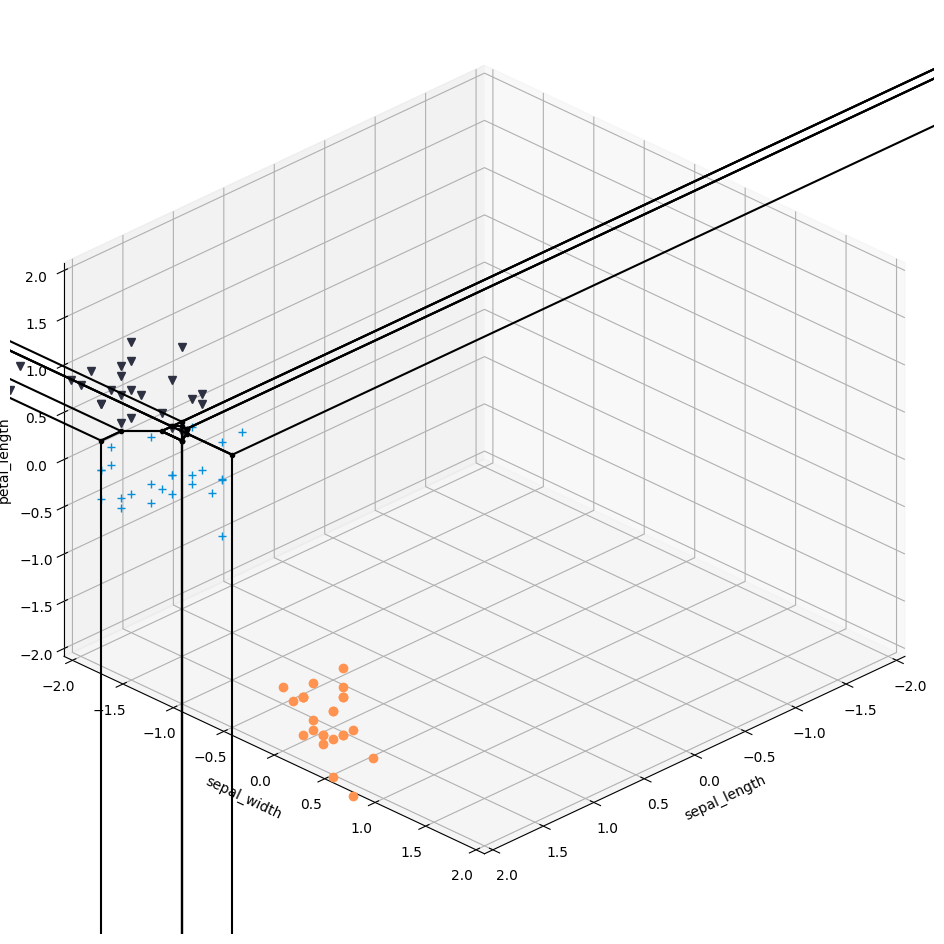

In [9]:
import matplotlib.pyplot as plt
from tropy.graph import init_ax, plot_classes, plot_polynomial_hypersurface_3d

fig = plt.figure(figsize=(12,12))
L = 2
ax = init_ax(fig, 111, L)

plot_classes(ax, Clist_train, L, features=features)

plot_polynomial_hypersurface_3d(ax, model.veronese_coefficients, model.apex, L)